<a href="https://colab.research.google.com/github/grandhigowthamramsai/rugved1/blob/main/decisiontrees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from google.colab import files
uploaded = files.upload()

Saving drug200.csv to drug200.csv


In [ ]:

df=pd.read_csv('drug200.csv')

In [ ]:
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [ ]:
df['BP'] = df['BP'].replace({
    'NORMAL': 0,
    'LOW': -1,
    'HIGH': 1
})


/tmp/ipython-input-4-534470855.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['BP'] = df['BP'].replace({


In [ ]:

df['Cholesterol'] = df['Cholesterol'].replace({
    'NORMAL': 0,
    'LOW': -1,
    'HIGH': 1
})


/tmp/ipython-input-5-2509773608.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Cholesterol'] = df['Cholesterol'].replace({


In [ ]:
df.Sex.value_counts()

,count
Sex,
M,104
F,96


In [ ]:

df.Drug.value_counts()

,count
Drug,
drugY,91
drugX,54
drugA,23
drugC,16
drugB,16


In [ ]:

df['Sex'] = df['Sex'].replace({
    'M': 1,
    'F': 0
})

/tmp/ipython-input-8-441579898.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Sex'] = df['Sex'].replace({


In [ ]:

df['Drug'] = df['Drug'].replace({
    'drugA': 0,
    'drugB': 1,
    'drugC': 2,
    'drugX': 3,
    'drugY': 4

})


/tmp/ipython-input-9-1092185559.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Drug'] = df['Drug'].replace({


In [ ]:
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,1,1,25.355,4
1,47,1,-1,1,13.093,2
2,47,1,-1,1,10.114,2
3,28,0,0,1,7.798,3
4,61,0,-1,1,18.043,4
...,...,...,...,...,...,...
195,56,0,-1,1,11.567,2
196,16,1,-1,1,12.006,2
197,52,1,0,1,9.894,3
198,23,1,0,0,14.020,3


In [ ]:

X=df.drop('Drug',axis=1)
y=df['Drug']

In [ ]:

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)


In [ ]:

clf=DecisionTreeClassifier(criterion="entropy",random_state=100,max_depth=5,min_samples_leaf=5)

clf.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=5,
                       random_state=100)

In [ ]:
y_pred=clf.predict(X_test)


In [ ]:
y_pred

array([3, 4, 3, 2, 4, 4, 4, 3, 0, 3, 0, 3, 4, 0, 1, 4, 1, 3, 2, 4, 1, 3,
       3, 4, 4, 4, 2, 3, 4, 3, 4, 2, 2, 4, 0, 4, 3, 0, 4, 0, 3, 3, 3, 4,
       4, 2, 4, 4, 4, 3, 3, 4, 3, 4, 3, 4, 0, 4, 4, 4])

In [ ]:
accuracy_score(y_test,y_pred)*100

100.0

[Text(0.6666666666666666, 0.9, 'x[4] <= 14.829\nentropy = 1.966\nsamples = 140\nvalue = [16, 13, 10, 36, 65]'),
 Text(0.5555555555555556, 0.7, 'x[2] <= 0.5\nentropy = 1.81\nsamples = 75\nvalue = [16, 13, 10, 36, 0]'),
 Text(0.6111111111111112, 0.8, 'True  '),
 Text(0.3333333333333333, 0.5, 'x[2] <= -0.5\nentropy = 0.755\nsamples = 46\nvalue = [0, 0, 10, 36, 0]'),
 Text(0.2222222222222222, 0.3, 'x[3] <= 0.5\nentropy = 0.998\nsamples = 21\nvalue = [0, 0, 10, 11, 0]'),
 Text(0.1111111111111111, 0.1, 'entropy = 0.0\nsamples = 11\nvalue = [0, 0, 0, 11, 0]'),
 Text(0.3333333333333333, 0.1, 'entropy = 0.0\nsamples = 10\nvalue = [0, 0, 10, 0, 0]'),
 Text(0.4444444444444444, 0.3, 'entropy = 0.0\nsamples = 25\nvalue = [0, 0, 0, 25, 0]'),
 Text(0.7777777777777778, 0.5, 'x[0] <= 50.5\nentropy = 0.992\nsamples = 29\nvalue = [16, 13, 0, 0, 0]'),
 Text(0.6666666666666666, 0.3, 'entropy = 0.0\nsamples = 16\nvalue = [16, 0, 0, 0, 0]'),
 Text(0.8888888888888888, 0.3, 'entropy = 0.0\nsamples = 13\nvalue 

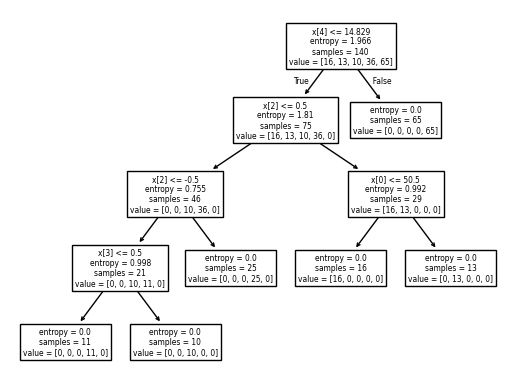

In [ ]:

from sklearn.tree import plot_tree
plot_tree(clf)